In [1]:
from nets import q_nets
from agents import q_agent
from environments import q_playground

In [2]:
batch_size = 32

env = q_playground.ImageEnvV1(flatten=True)
buffer = q_agent.ExperienceReplay(batch_size)
agent = q_agent.Simple_Agent(env, buffer)

In [3]:
env_state_size = env.state_size
net_params = {
    'in_size': env_state_size,
    'n_features': [512],
    'out_size': env_state_size,
}

In [4]:
net = q_nets.Simple_QL_FC(net_params)

In [5]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)

Simple_QL_FC(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=512, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=512, out_features=100, bias=True)
  )
)

In [6]:
for i in range(batch_size):
    agent.play_step(net, 0, device)

In [7]:
batch = buffer.sample(batch_size)
states, actions, rewards, dones, next_states = batch
print(actions)

[15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15]


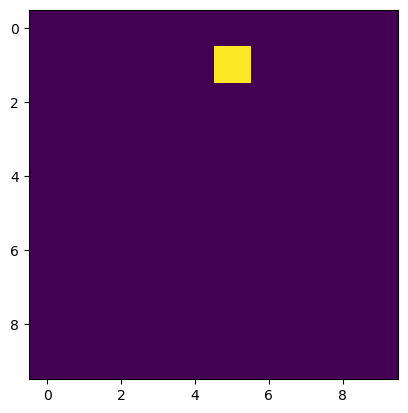

In [8]:
import matplotlib.pyplot as plt


curr_state = env.get_img_state()
plt.imshow(curr_state)

In [9]:
s = -torch.tensor([[1, 0, 0, 1, 0]]).repeat(4, 1) + 1
q = torch.arange(10, 15).repeat(4, 1)
print(s)
print(q)

tensor([[0, 1, 1, 0, 1],
        [0, 1, 1, 0, 1],
        [0, 1, 1, 0, 1],
        [0, 1, 1, 0, 1]])
tensor([[10, 11, 12, 13, 14],
        [10, 11, 12, 13, 14],
        [10, 11, 12, 13, 14],
        [10, 11, 12, 13, 14]])


In [10]:
q_filtered = q * s
print(q_filtered)

tensor([[ 0, 11, 12,  0, 14],
        [ 0, 11, 12,  0, 14],
        [ 0, 11, 12,  0, 14],
        [ 0, 11, 12,  0, 14]])


In [26]:
n_actions = 10
r_vector = torch.randn(n_actions)
action_space = q_playground.action_space(n_actions)
action_space.reset()
for i in range(n_actions):
    #print("!!! sample #", i)

    a = action_space.sample()
    r_vector[action_space.legal_action_mask == 0] = -float('inf')
    print("action ", a)
    print("vec", r_vector)
    #print("mask", action_space.legal_action_mask)
    #print("legal number", action_space.n_legal_actions)

action  7
vec tensor([ 0.9070, -1.4018, -0.6644,  0.6339,  0.4448,  0.1872,  0.1926,    -inf,
        -1.2850, -1.5026])
action  1
vec tensor([ 0.9070,    -inf, -0.6644,  0.6339,  0.4448,  0.1872,  0.1926,    -inf,
        -1.2850, -1.5026])
action  8
vec tensor([ 0.9070,    -inf, -0.6644,  0.6339,  0.4448,  0.1872,  0.1926,    -inf,
           -inf, -1.5026])
action  4
vec tensor([ 0.9070,    -inf, -0.6644,  0.6339,    -inf,  0.1872,  0.1926,    -inf,
           -inf, -1.5026])
action  3
vec tensor([ 0.9070,    -inf, -0.6644,    -inf,    -inf,  0.1872,  0.1926,    -inf,
           -inf, -1.5026])
action  9
vec tensor([ 0.9070,    -inf, -0.6644,    -inf,    -inf,  0.1872,  0.1926,    -inf,
           -inf,    -inf])
action  0
vec tensor([   -inf,    -inf, -0.6644,    -inf,    -inf,  0.1872,  0.1926,    -inf,
           -inf,    -inf])
action  2
vec tensor([  -inf,   -inf,   -inf,   -inf,   -inf, 0.1872, 0.1926,   -inf,   -inf,
          -inf])
action  6
vec tensor([  -inf,   -inf,   -i